#**UAS Data Analysis**

##**Table of Contents (Sequentially)**
-> PROBLEM/QUESTIONS

-> Answer

-> Note

-> Data Modeling

-> Model Evaluation

-> Exploratory Data Analysis

-> Transform The Data

-> Data Preprocessing

-> Extract Rules Using Association Rule Algorithm and Apriori Algorithm

-> Rule Extraction Using Confidence as Metric

-> Visualization Using Confidence as Metric

-> Extraction Rules Result Using Confidence as Metrics

-> Rule Extraction Using Lift as Metric

-> Visualization Using Lift as Metric

-> Extraction Rules Result Using Lift as Metrics

-> Comparison of The Performance of Algorithm

-> Conclusion

##***PROBLEM/QUESTIONS:***

**1. Question 1: Sub-CLO 3 & 4 Weight (37.5%)**

Gather open-source datasets to acquire the data with the following criteria:

a. Datasets should have a minimum of 1000 rows and 6 columns, and should not be older than 5 
years. 

b. Datasets should contain both numeric and categorical variable

c. Datasets should in CSV, XLSX, or JSON format

Do a visualization for:

a. Exploratory Data Analysis

b. Machine Learning Result (Classification, Clustering, Regression or Association Rules)

c. Evaluation comparison between Algorithm #1 and Algorithm #2

**2. Question 2: Sub-CLO 1 & 2, Weight (62.5%)**

Do Data Preprocessing, Modeling, Model Evaluation, and compare the performance of algorithm #1 
and algorithm #2 for the chosen dataset. (Clustering/Classification/Regression/Association Rules)

##**Answer**

####**Note**

If you find error while running the program, try upgrade your gensim and numpy by running 2 codes below and then restart runtime, thank you.

In [1]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.22.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0


In [2]:
pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.0 which is incompatible.


###**Data Modeling**

Market basket analysis on this data used association rules to find correlations between items purchased.

###**Model Evaluation**

The market basket analysis carried out in this study uses the association rules algorithm and the Apriori algorithm. In addition, confidence and lift will be use as metrics. Besides that, comparison between these two (2) algorithms will be seen from their role in this study.

In [3]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from IPython.core.display import display, HTML
import gensim
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline



/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Loop the data lines
with open("groceries.csv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]
    
# Free memory space
del temp_f

# Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

# Read csv
df = pd.read_csv("groceries.csv", header=None, delimiter=",", names=column_names)

In [5]:
headers = []
for i in range(1,33):
    headers.append('item '+str(i))

df.columns = headers

###**Exploratory Data Analysis**

First thing first, the data quality must be checked first

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item 1   9835 non-null   object
 1   item 2   7676 non-null   object
 2   item 3   6033 non-null   object
 3   item 4   4734 non-null   object
 4   item 5   3729 non-null   object
 5   item 6   2874 non-null   object
 6   item 7   2229 non-null   object
 7   item 8   1684 non-null   object
 8   item 9   1246 non-null   object
 9   item 10  896 non-null    object
 10  item 11  650 non-null    object
 11  item 12  468 non-null    object
 12  item 13  351 non-null    object
 13  item 14  273 non-null    object
 14  item 15  196 non-null    object
 15  item 16  141 non-null    object
 16  item 17  95 non-null     object
 17  item 18  66 non-null     object
 18  item 19  52 non-null     object
 19  item 20  38 non-null     object
 20  item 21  29 non-null     object
 21  item 22  18 non-null     object
 22  

In [7]:
df.head()

,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,...,item 23,item 24,item 25,item 26,item 27,item 28,item 29,item 30,item 31,item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The table above shows us that the data is not structured in a normal tabular way. Therefore the data has to be restructured to be manageable. 

In [8]:
text = df.values.astype(str).tolist()
text = [[item for item in row if (str(item) != 'nan')&(item!='')] for row in text]
text_sorted = []
for item in text:
    item.sort()
    text_sorted.append(item)
    
text_sorted[:6]

[['citrus fruit', 'margarine', 'ready soups', 'semi-finished bread'],
 ['coffee', 'tropical fruit', 'yogurt'],
 ['whole milk'],
 ['cream cheese', 'meat spreads', 'pip fruit', 'yogurt'],
 ['condensed milk',
  'long life bakery product',
  'other vegetables',
  'whole milk'],
 ['abrasive cleaner', 'butter', 'rice', 'whole milk', 'yogurt']]

The data is transformed to a list of lists, sorted in each sub-list. It is sorted to ensure that various permutations are seen as the same combination of items. 

In [9]:
text_sorted_filter_length = []

for item in text_sorted:
    if len(item) > 2:
        text_sorted_filter_length.append(item)

text_sorted_filter_length.sort(key=len)
text_sorted_filter_length[:6]

[['coffee', 'tropical fruit', 'yogurt'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['beef', 'detergent', 'grapes'],
 ['citrus fruit', 'newspapers', 'zwieback'],
 ['brown bread', 'canned beer', 'packaged fruit/vegetables'],
 ['pastry', 'rolls/buns', 'sugar']]

The output above shows the frequency of combinations of three items or more.

In [10]:
len(text_sorted_filter_length)

6033

There are more than 6000 combinations for 3 or more items purchased. 

In [11]:
df_plot = pd.DataFrame(pd.Series(text_sorted_filter_length).value_counts()).reset_index()
df_plot

,index,0
0,"[rolls/buns, sausage, soda]",10
1,"[bottled beer, liquor, red/blush wine]",5
2,"[rolls/buns, sausage, whole milk]",4
3,"[bottled beer, liquor, red/blush wine, soda]",4
4,"[pastry, rolls/buns, soda]",4
...,...,...
5916,"[margarine, other vegetables, photo/film, pip ...",1
5917,"[berries, sugar, whipped/sour cream, yogurt]",1
5918,"[beef, butter milk, citrus fruit, curd]",1
5919,"[frozen meals, pip fruit, softener, tropical f...",1


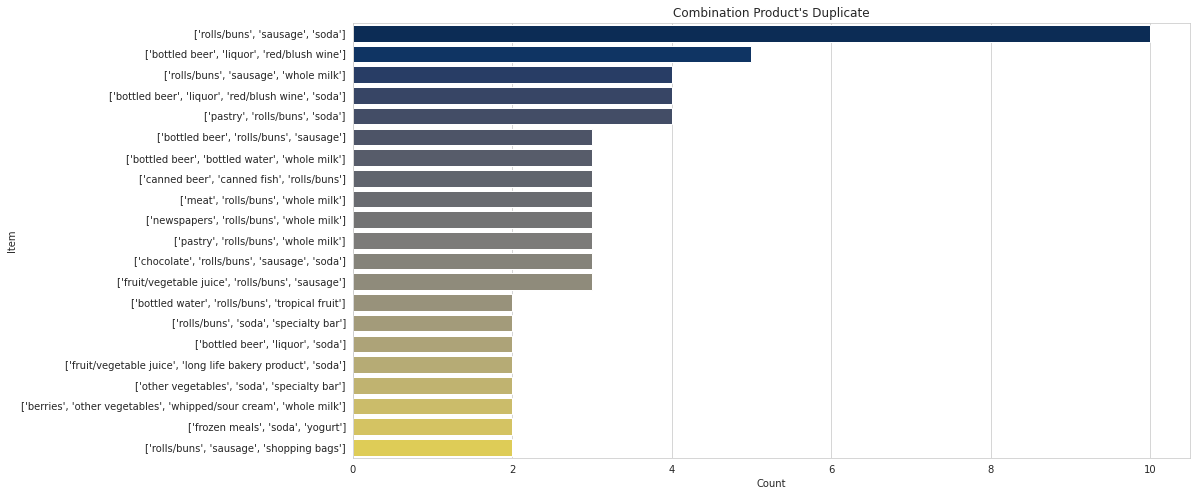

In [12]:
df_plot.columns = ['Item','Count']
df_plot['Item'] = df_plot['Item'].astype(str)
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.title("Combination Product's Duplicate")
sns.barplot(y='Item', x='Count', data=df_plot[:21], palette='cividis');

The figure above shows that there are not many combinations duplicated.

In [13]:
df_plot.astype(str).head()

,Item,Count
0,"['rolls/buns', 'sausage', 'soda']",10
1,"['bottled beer', 'liquor', 'red/blush wine']",5
2,"['rolls/buns', 'sausage', 'whole milk']",4
3,"['bottled beer', 'liquor', 'red/blush wine', '...",4
4,"['pastry', 'rolls/buns', 'soda']",4


In [14]:
text = [item for sublist in text for item in sublist]
text = [w.replace(' ', '_') for w in text]
text = [w.replace('/', '_') for w in text]
text.sort()
text[:10]

['Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products']

In [15]:
pd.Series(text).value_counts()

whole_milk               2513
other_vegetables         1903
rolls_buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen_utensil             4
preservation_products       2
baby_food                   1
sound_storage_medium        1
Length: 169, dtype: int64

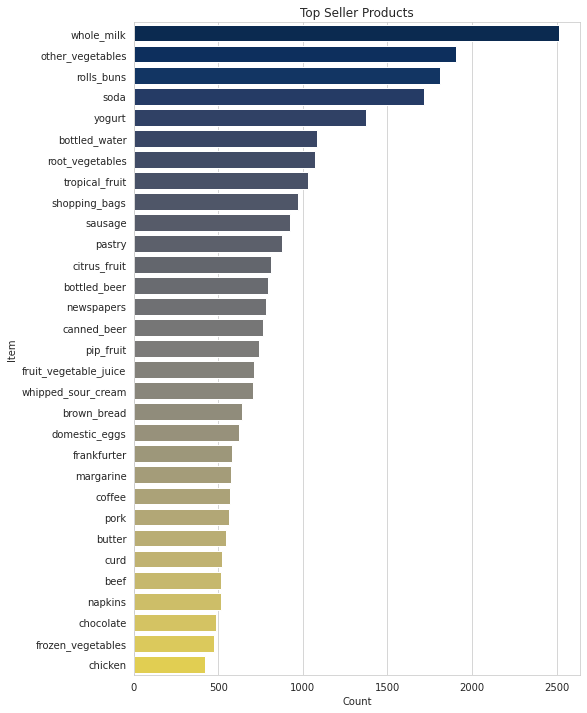

In [16]:
df_plot = pd.DataFrame(pd.Series(text).value_counts()).reset_index()
df_plot.columns = ['Item','Count']
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
plt.title("Top Seller Products")
sns.barplot(y='Item', x='Count', data=df_plot[:31], palette='cividis');

The figure above shows the most occuring items throughout all purchases

There are 43,367 items


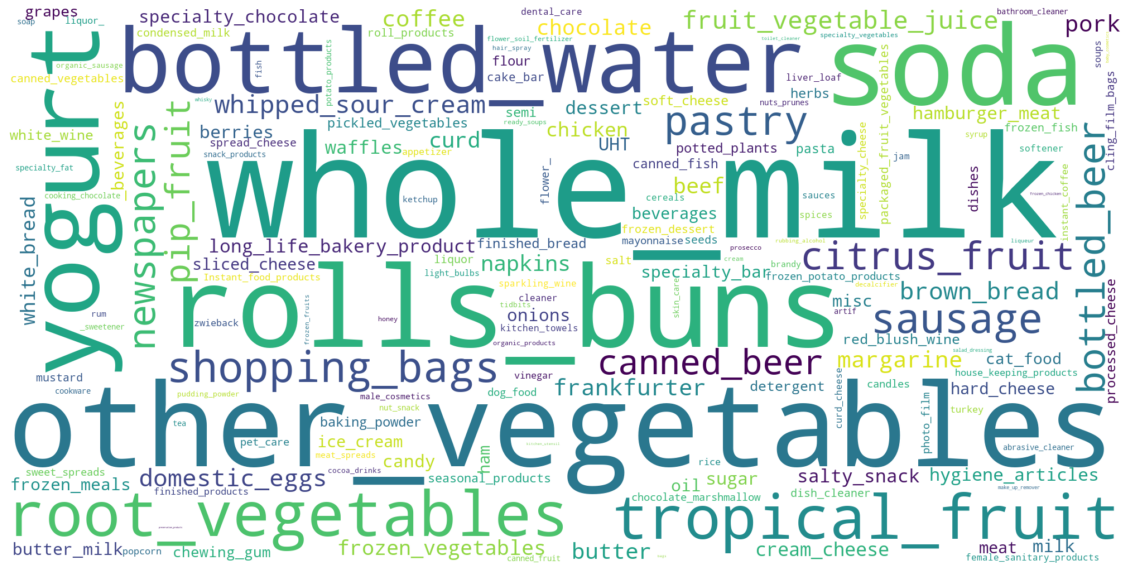

In [17]:
nr_words = '{:,}'.format(len(text))
print ("There are",nr_words,"items",)

wordcloud = WordCloud( background_color="white",width=2000, height=1000,max_words=500,collocations=False).generate(" ".join(text))
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The figure above shows the most occuring items in purchases in a word cloud.


In [18]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
!pip install adjustText
from adjustText import adjust_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=36d84a80ff9ecdb3553b5bd36efef29eb870635d46f562969039e8cf761a1967
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


In [19]:
sentences = []
for i, row in df.iterrows():
    vals = row.values[1:].astype(str)
    
    # Remove the nans
    vals = vals[vals != 'nan']
    
    for _ in range(min(3, len(vals))):
        np.random.shuffle(vals)
        sentences.append(list(vals))
        
print('\n'.join([', '.join(x) for x in sentences[:10]]))

semi-finished bread, ready soups, margarine
semi-finished bread, margarine, ready soups
ready soups, semi-finished bread, margarine
yogurt, coffee
coffee, yogurt
meat spreads, yogurt, cream cheese
cream cheese, meat spreads, yogurt
meat spreads, yogurt, cream cheese
long life bakery product, whole milk, condensed milk
condensed milk, long life bakery product, whole milk


In [20]:
print('Embedding {} sentences...'.format(len(sentences)))
    
model = Word2Vec(
    sentences,
    window=3,
    workers=1,
    sg=0,
    negative=25,
    min_count=1,
    seed=42,
    compute_loss=True
)

print(model.get_latest_training_loss())

Embedding 18443 sentences...
1225776.375


168 (168, 100)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


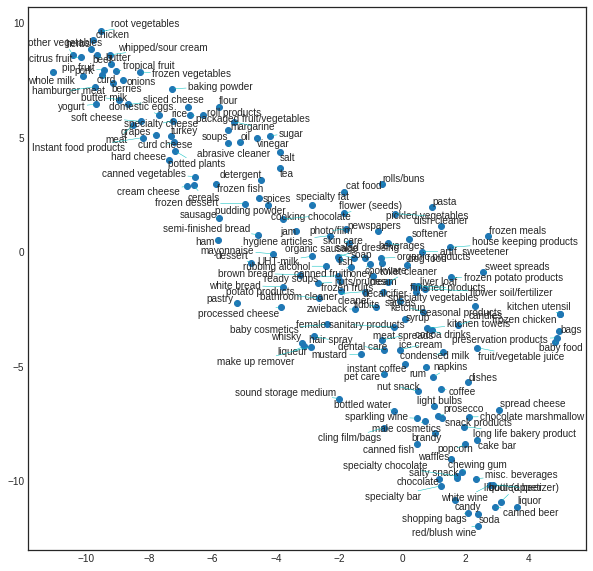

In [21]:

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize']=20
# plt.rcParams['xtick.labelsize']=16
# plt.rcParams['ytick.labelsize']=16
# plt.rcParams['legend.fontsize']=16

products = list(model.wv.index_to_key)
embeddings = []
for product in products:
    embeddings.append(model.wv[product])
embeddings = np.array(embeddings)
print(len(products), embeddings.shape)

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

texts = []
for x, y, lab in zip(X_tsne[:, 0], X_tsne[:, 1], products):
    text = plt.text(x, y, lab)
    texts.append(text)
    
adjust_text(texts, lim=5, arrowprops=dict(arrowstyle="-", color='c', lw=0.5))
plt.show()

The figure above is generated randomly. Generally frequent bought together items are shown together. We see for instance that dairy products and vegetable/fruit products are found together. These items are considered similar because they are brough together frequently. Soda, beers, wines, beverages, and liquor appear together as they are frequently brought together.

####**Transform The Data**

In this section, the data will be transformed so that it is ready for use in data processing using the apriori algorithm and association rules

In [22]:
transactions = df.values.astype(str).tolist()
transactions = [[item for item in row if item != 'nan'] for row in transactions]
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

The transactions are codified into a list of lists where nan values are dropped

###**Data Preprocessing**

In preprocessing the data determines the tabulator of the sales transaction data. The tabulator format is a calculation of how many occurrences of each sales item in groceries store. The the data is transformed through one-hot encoding with items as columns and True/False for each purchase.

In [61]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [62]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
df.shape

(9835, 169)

The shape above shows that there are 168 unique items, and 9835 purchases to evaluate.

####**Extract Rules Using Association Rule Algorithm and Apriori Algorithm**

In this section, the support value will be calculated and the rules will be extracted with the association rule algorithm. The rules provide the confidence, lift and many more metrics to determine the consequents and antecedents.

Now the support is calculated for each items using the apriori algorithm. The apriori algorithm was selected for support greater than 1%, which gives about 99 hits or more in the dataset. This was to ensure that there were enough purchases (instances) that leads to a derived rule. The result was 333 itemsets. 

In [26]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [27]:
frequent_itemsets.count()['itemsets']

333

In [28]:
frequent_itemsets.nlargest(n = 20, columns = 'support')

,support,itemsets
86,0.255516,(whole milk)
55,0.193493,(other vegetables)
66,0.183935,(rolls/buns)
75,0.174377,(soda)
87,0.139502,(yogurt)
6,0.110524,(bottled water)
67,0.108998,(root vegetables)
81,0.104931,(tropical fruit)
73,0.098526,(shopping bags)
70,0.093950,(sausage)


The itemsets are ranked by support level above. The figures above show the dominant itemsets, which is whole milk and other vegetables. The combination of these two even shows up in the top 20 (see the itemset 239).  
Three other items that show up frequently is rolls/buns, soda and yogurt. We’ll keep track of these items as well since it seems that they’ll feature strongly as well.

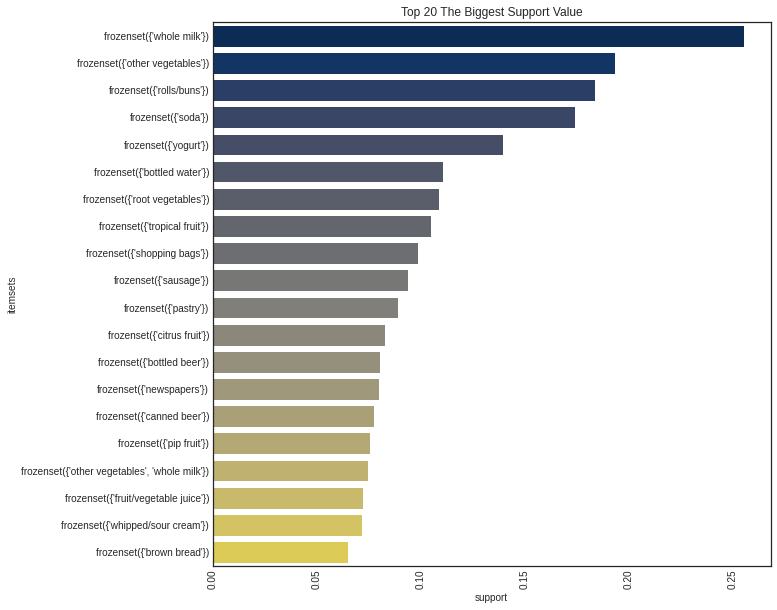

In [29]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title("Top 20 The Biggest Support Value")
sns.barplot(y='itemsets', x='support', data=frequent_itemsets.nlargest(n = 20, columns = 'support'),palette='cividis')

The figure above shows the top 20 of biggest support value items.

Next step is to determine the lift threshold to prevent too many rules from being extracted. 

In [30]:
rules_plot_lift = []
for conf in np.linspace(0,4,20):
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=conf)
    rules_plot_lift.append(len(rules))

Text(0, 0.5, 'nr of rules')

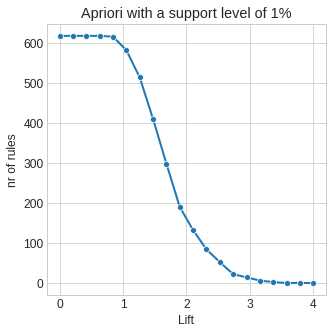

In [31]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
sns.lineplot(x=np.linspace(0,4,20),
             y=rules_plot_lift,
             # style="logic",
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Lift')
plt.ylabel('nr of rules')
# sns.despine()

In [32]:
rules_plot_conf = []
for conf in np.linspace(0,1,20):
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    rules_plot_conf.append(len(rules))

Text(0, 0.5, 'nr of rules')

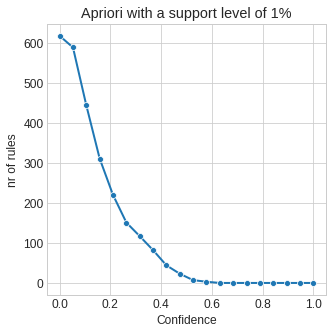

In [33]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_conf,
             # style="logic",
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Confidence')
plt.ylabel('nr of rules')
# sns.despine()

The metric that was used was confidence, where the confidence threshold was set at 40%. This was simply to ensure that the result is not overwhelmed with too many rules. Another check was for lift (shown in the figure above). The checks show how the number of rules can grow if confidence threshold is relaxed. Above shows the growth with lift as metric. The charts become unreadable when more than 70 rules are extracted.

####**Rule Extraction Using Confidence as Metric**


The 40% confidence threshold provides a manageable 62 rules shown in the table below. 

In [63]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.40)
rules.sort_values(by=['confidence'], ascending=False).head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
43,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
32,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
26,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
58,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
...,...,...,...,...,...,...,...,...,...
49,"(whole milk, tropical fruit)",(other vegetables),0.042298,0.193493,0.017082,0.403846,2.087140,0.008898,1.352851
21,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
17,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
14,(oil),(whole milk),0.028063,0.255516,0.011286,0.402174,1.573968,0.004116,1.245319


In [35]:
rules.shape

(62, 9)

The table below is simply to clean up the output. Conspicuously absent from the consequents are rolls/buns, soda and yogurt. The confidence must be relaxed to 30% to start seeing yogurt and rolls/buns, but soda is then still absent from the rules. This is unexpected. 

In [36]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules['rule'] = rules.index
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1).sort_values(by=['confidence'], ascending=False).head(100)

,antecedents,consequents,support,confidence,lift,leverage,rule
28,"(citrus fruit, root vegetables)",(other vegetables),0.010371,0.586207,3.029608,0.006948,28
43,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999,0.008231,43
32,"(curd, yogurt)",(whole milk),0.010066,0.582353,2.279125,0.005649,32
26,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885,0.006371,26
58,"(root vegetables, tropical fruit)",(whole milk),0.011998,0.570048,2.230969,0.006620,58
...,...,...,...,...,...,...,...
49,"(whole milk, tropical fruit)",(other vegetables),0.017082,0.403846,2.087140,0.008898,49
21,(tropical fruit),(whole milk),0.042298,0.403101,1.577595,0.015486,21
17,(whipped/sour cream),(other vegetables),0.028876,0.402837,2.081924,0.015006,17
14,(oil),(whole milk),0.011286,0.402174,1.573968,0.004116,14


The parallel coordinates plot below shows that the most connected consequents are whole milk and other vegetables for rules with a support of >0.01, confidence level greater than 30% and at least two antecedents. It is interesting that in this case there are no consequents with length 2 or more. We can see that there are certain itemsets that lead to both consequents, although they’re not clear on this figure, another visualization will be used to make it clearer.

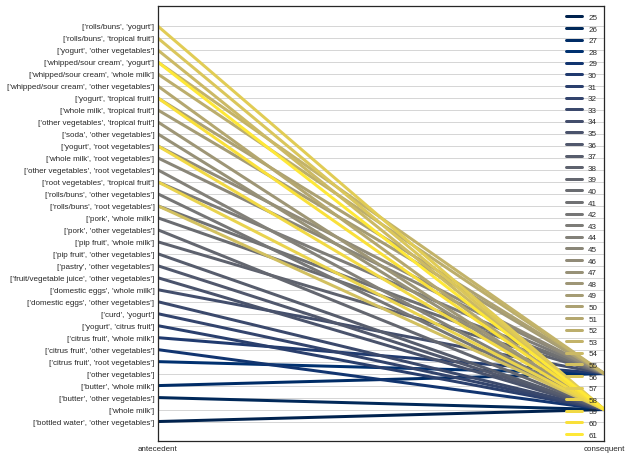

In [37]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 3

from pandas.plotting import parallel_coordinates
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
coords = rules[['antecedent','consequent','rule']][rules['antecedent_len']>1]

parallel_coordinates(coords,'rule', colormap = 'cividis')
plt.show()

In [38]:
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1)[rules['antecedent_len'] >= 2].head(20)

,antecedents,consequents,support,confidence,lift,leverage,rule,antecedent,consequent
25,"(bottled water, other vegetables)",(whole milk),0.010778,0.434426,1.700192,0.004439,25,"['bottled water', 'other vegetables']",['whole milk']
26,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885,0.006371,26,"['butter', 'other vegetables']",['whole milk']
27,"(butter, whole milk)",(other vegetables),0.011490,0.416974,2.154987,0.006158,27,"['butter', 'whole milk']",['other vegetables']
28,"(citrus fruit, root vegetables)",(other vegetables),0.010371,0.586207,3.029608,0.006948,28,"['citrus fruit', 'root vegetables']",['other vegetables']
29,"(citrus fruit, other vegetables)",(whole milk),0.013015,0.450704,1.763898,0.005636,29,"['citrus fruit', 'other vegetables']",['whole milk']
30,"(citrus fruit, whole milk)",(other vegetables),0.013015,0.426667,2.205080,0.007113,30,"['citrus fruit', 'whole milk']",['other vegetables']
31,"(yogurt, citrus fruit)",(whole milk),0.010269,0.474178,1.855768,0.004736,31,"['yogurt', 'citrus fruit']",['whole milk']
32,"(curd, yogurt)",(whole milk),0.010066,0.582353,2.279125,0.005649,32,"['curd', 'yogurt']",['whole milk']
33,"(domestic eggs, other vegetables)",(whole milk),0.012303,0.552511,2.162336,0.006613,33,"['domestic eggs', 'other vegetables']",['whole milk']
34,"(domestic eggs, whole milk)",(other vegetables),0.012303,0.410169,2.119820,0.006499,34,"['domestic eggs', 'whole milk']",['other vegetables']


####**Visualization Using Confidence as Metric**

This section is where the rules are visualized.

<Figure size 720x720 with 0 Axes>

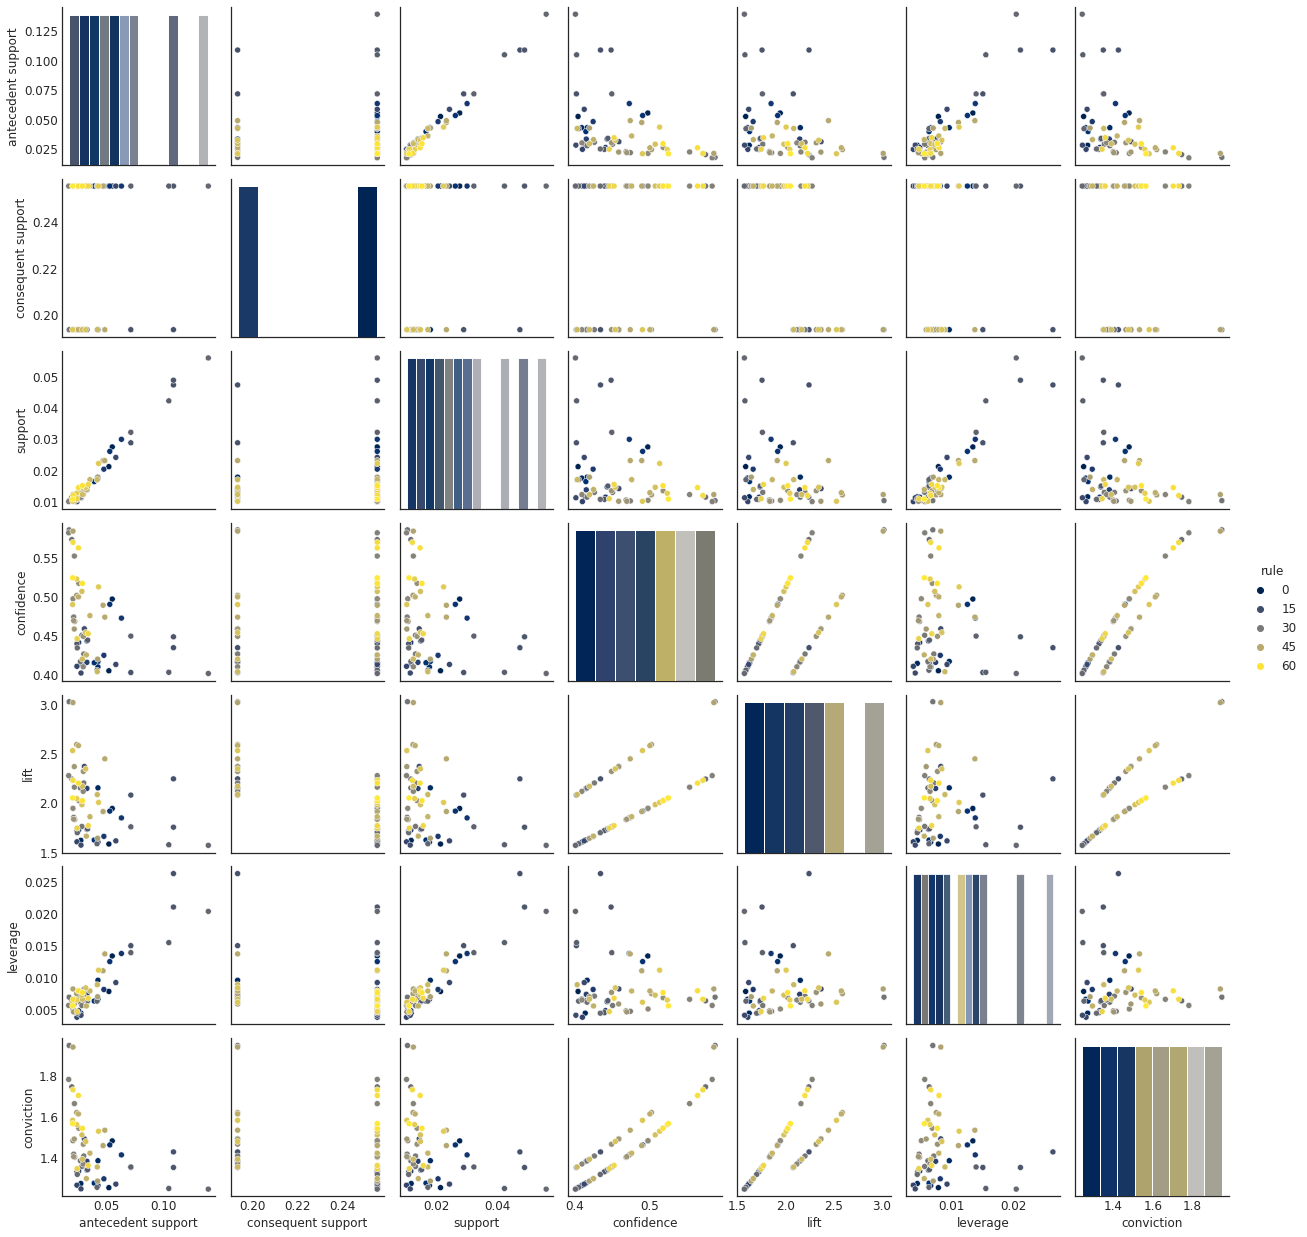

<Figure size 576x576 with 0 Axes>

In [39]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 3

plt.figure(figsize=(10,10))
sns.set_style('white')
plot_kws={"s": 1}
g = sns.pairplot(
             rules.drop(['antecedent_len','consequent_len'],axis=1),
             # kind='reg',
             diag_kind='hist',
             corner=False,
             # plot_kws=dict(scatter_kws=dict(s=5)),
             palette='cividis',
             hue='rule'
            )

# g = g.map_diag(sns.kdeplot, lw=2)
# g = g.map_offdiag(sns.kdeplot, lw=0.5)
plt.show()
sns.despine()

The pairplot above shows the relationship between metrics. Although interesting, it tells us little about the relationship items have with each other. An interesting portion is the low correlation between support and confidence. Another interesting portion is that the rules are not specifically arranged in any order when evaluating support and confidence, although a pattern seems to emerge for lift and confidence.

a better approach would be to draw network diagrams. 

In [40]:
import networkx as nx
rules.sort_values(['confidence']).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len,rule,antecedent,consequent
24,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,1,1,24,['yogurt'],['whole milk']
14,(oil),(whole milk),0.028063,0.255516,0.011286,0.402174,1.573968,0.004116,1.245319,1,1,14,['oil'],['whole milk']
17,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565,1,1,17,['whipped/sour cream'],['other vegetables']
21,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,1,1,21,['tropical fruit'],['whole milk']
49,"(whole milk, tropical fruit)",(other vegetables),0.042298,0.193493,0.017082,0.403846,2.087140,0.008898,1.352851,2,1,49,"['whole milk', 'tropical fruit']",['other vegetables']


In [41]:
G = nx.from_pandas_edgelist(rules,
                            source='antecedent',
                            target='consequent',
                            edge_attr='confidence'
                            # edge_attr=True
                           )

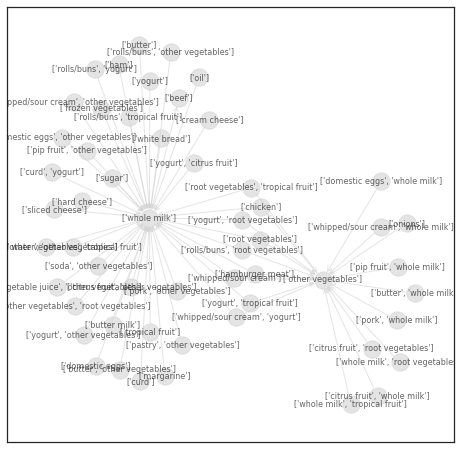

In [42]:
nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey'
                 # node_color=rules['support'].iloc[:47]
                )

The network is generated randomly. Whole milk and other vegetables seem to be strong nodes (consequents) that follow from most purchased items.   

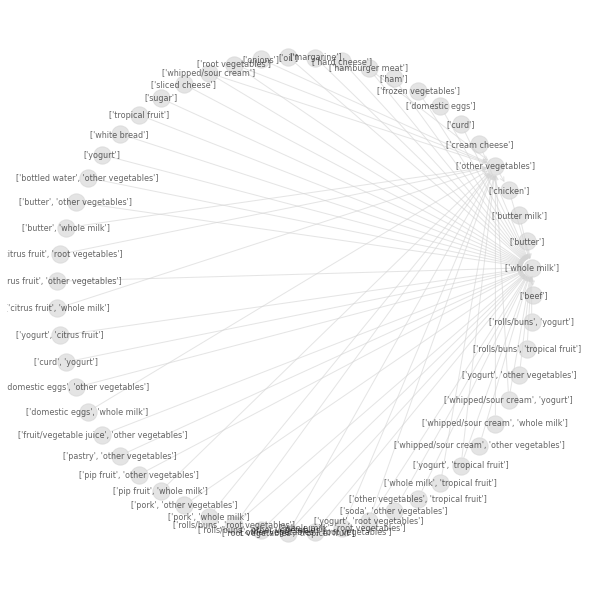

In [43]:
nx.draw_circular(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey'
                 # node_color=rules.sort_values(['support'])['support'].iloc[:47]
                )

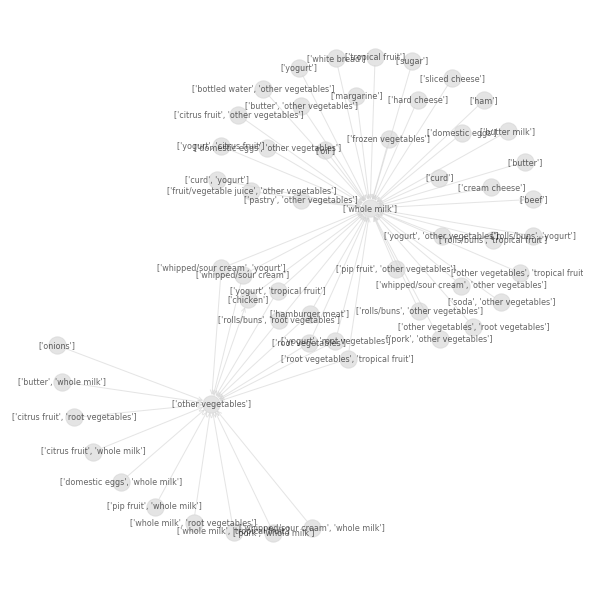

In [44]:
plt.rcParams['figure.figsize']=8,8
nx.draw_kamada_kawai(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey',
                )

In [45]:
def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['figure.figsize']=10,3 
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']='darkslategrey'
    plt.rcParams['ytick.color']='darkslategrey'
    plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linewidth=0.5,color='lightgray',alpha=0.8)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linewidth=0.5,color='lightgray',alpha=0.8)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color='gray')
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))


####**Extraction Rules Result Using Confidence as Metrics**

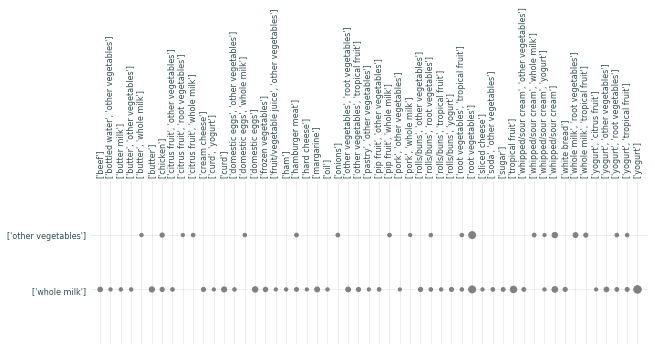

In [46]:
# catscatter(rules,'antecedent','consequent','support')

kcolors=['#F73972','#F2B3C6','#144962']
# create the plot
catscatter(rules,'antecedent','consequent','support',color=kcolors, ratio=1000)
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

The category scatterplot above show that whole milk is the most frequent consequent (y-axis). The size of the marks on the chart is the support, showing that root vegetables have the most support for both whole milk and other vegetables, and that yogurt the next best for whole milk.

####**Rule Extraction Using Lift as Metric**

Lift is the metric in this section, where a threshold of 2.4 is chosen to keep the number of rules (64) manageable. 

In [47]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2.40)
rules.sort_values(by=['confidence'], ascending=False).head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
29,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
25,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792
39,"(yogurt, root vegetables)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015
48,"(whipped/sour cream, yogurt)",(other vegetables),0.020742,0.193493,0.010168,0.490196,2.533410,0.006154,1.581995
...,...,...,...,...,...,...,...,...,...
40,(other vegetables),"(yogurt, root vegetables)",0.193493,0.025826,0.012913,0.066737,2.584078,0.007916,1.043836
32,(other vegetables),"(root vegetables, tropical fruit)",0.193493,0.021047,0.012303,0.063584,3.020999,0.008231,1.045425
26,(other vegetables),"(rolls/buns, root vegetables)",0.193493,0.024301,0.012201,0.063058,2.594890,0.007499,1.041366
14,(other vegetables),"(citrus fruit, root vegetables)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941


In [48]:
rules.shape

(64, 9)

In [49]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules['rule'] = rules.index
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1).sort_values(by=['confidence'], ascending=False).head(100)

,antecedents,consequents,support,confidence,lift,leverage,rule
11,"(citrus fruit, root vegetables)",(other vegetables),0.010371,0.586207,3.029608,0.006948,11
29,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999,0.008231,29
25,"(rolls/buns, root vegetables)",(other vegetables),0.012201,0.502092,2.594890,0.007499,25
39,"(yogurt, root vegetables)",(other vegetables),0.012913,0.500000,2.584078,0.007916,39
48,"(whipped/sour cream, yogurt)",(other vegetables),0.010168,0.490196,2.533410,0.006154,48
...,...,...,...,...,...,...,...
40,(other vegetables),"(yogurt, root vegetables)",0.012913,0.066737,2.584078,0.007916,40
32,(other vegetables),"(root vegetables, tropical fruit)",0.012303,0.063584,3.020999,0.008231,32
26,(other vegetables),"(rolls/buns, root vegetables)",0.012201,0.063058,2.594890,0.007499,26
14,(other vegetables),"(citrus fruit, root vegetables)",0.010371,0.053600,3.029608,0.006948,14


Soda is then still absent from the rules shown in the table above. This is unexpected. 

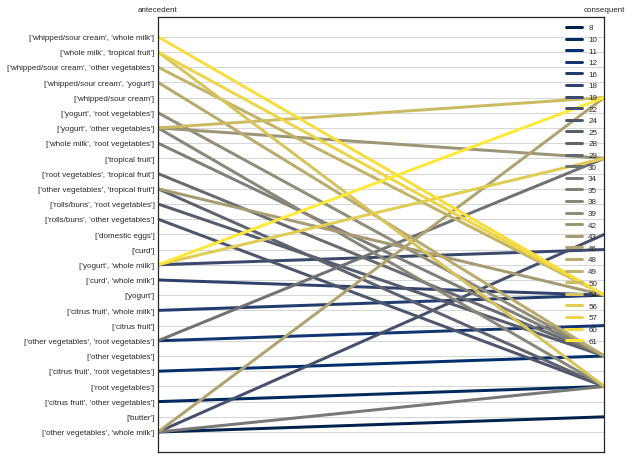

In [50]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 3

from pandas.plotting import parallel_coordinates
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
coords = rules[['antecedent','consequent','rule']][rules['antecedent_len']>1]

parallel_coordinates(coords,'rule', colormap = 'cividis')
plt.show()

The parallel coordinates plot above shows that the most connected consequents are whole milk and other vegetables for rules with a support of >0.01, lift level greater than 2.4 and at least two antecedents. It is interesting that in this case there are no consequents with length 2 or more. We can see that there are certain itemsets that lead to both consequents, although they’re not clear on this figure, another visualization will be used to make it clearer.

In [51]:
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1)[rules['antecedent_len'] >= 2].head(20)

,antecedents,consequents,support,confidence,lift,leverage,rule,antecedent,consequent
8,"(other vegetables, whole milk)",(butter),0.011490,0.153533,2.770630,0.007343,8,"['other vegetables', 'whole milk']",['butter']
10,"(citrus fruit, other vegetables)",(root vegetables),0.010371,0.359155,3.295045,0.007224,10,"['citrus fruit', 'other vegetables']",['root vegetables']
11,"(citrus fruit, root vegetables)",(other vegetables),0.010371,0.586207,3.029608,0.006948,11,"['citrus fruit', 'root vegetables']",['other vegetables']
12,"(other vegetables, root vegetables)",(citrus fruit),0.010371,0.218884,2.644626,0.006450,12,"['other vegetables', 'root vegetables']",['citrus fruit']
16,"(citrus fruit, whole milk)",(yogurt),0.010269,0.336667,2.413350,0.006014,16,"['citrus fruit', 'whole milk']",['yogurt']
18,"(curd, whole milk)",(yogurt),0.010066,0.385214,2.761356,0.006421,18,"['curd', 'whole milk']",['yogurt']
19,"(yogurt, whole milk)",(curd),0.010066,0.179673,3.372304,0.007081,19,"['yogurt', 'whole milk']",['curd']
22,"(other vegetables, whole milk)",(domestic eggs),0.012303,0.164402,2.591178,0.007555,22,"['other vegetables', 'whole milk']",['domestic eggs']
24,"(rolls/buns, other vegetables)",(root vegetables),0.012201,0.286396,2.627525,0.007558,24,"['rolls/buns', 'other vegetables']",['root vegetables']
25,"(rolls/buns, root vegetables)",(other vegetables),0.012201,0.502092,2.594890,0.007499,25,"['rolls/buns', 'root vegetables']",['other vegetables']


####**Visualization Using Lift as Metric**

This section is where the rules are visualized.

<Figure size 720x720 with 0 Axes>

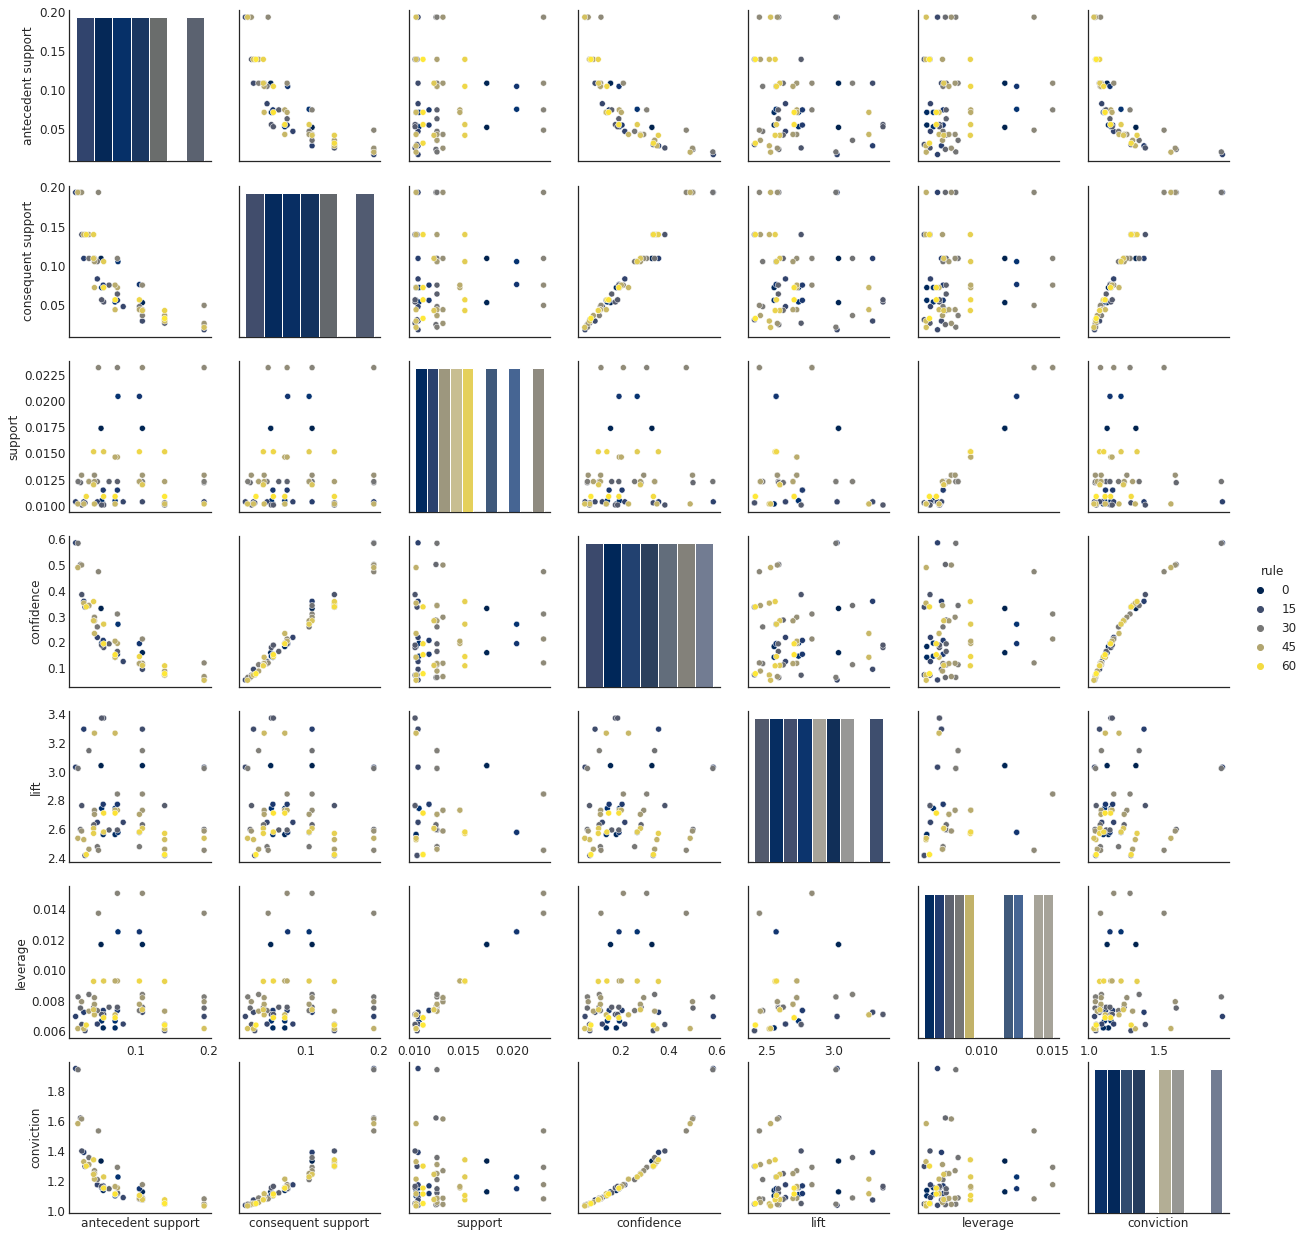

<Figure size 576x576 with 0 Axes>

In [52]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 3

plt.figure(figsize=(10,10))
sns.set_style('white')
plot_kws={"s": 1}
g = sns.pairplot(
             rules.drop(['antecedent_len','consequent_len'],axis=1),
             # kind='reg',
             diag_kind='hist',
             corner=False,
             # plot_kws=dict(scatter_kws=dict(s=5)),
             palette='cividis',
             hue='rule'
            )

# g = g.map_diag(sns.kdeplot, lw=2)
# g = g.map_offdiag(sns.kdeplot, lw=0.5)
plt.show()
sns.despine()

The pairplot above shows the relationship between metrics. It tells us little about the relationship items have with each other. An interesting portion is the low correlation between support and confidence. Another interesting portion is that the rules are not specifically arranged in any order when evaluating support and confidence, although a pattern seems to emerge for lift and confidence.

a better approach would be to draw network diagrams. 

In [53]:
import networkx as nx
rules.sort_values(['confidence']).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len,rule,antecedent,consequent
53,(other vegetables),"(whipped/sour cream, yogurt)",0.193493,0.020742,0.010168,0.052549,2.533410,0.006154,1.033570,1,2,53,['other vegetables'],"['whipped/sour cream', 'yogurt']"
14,(other vegetables),"(citrus fruit, root vegetables)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941,1,2,14,['other vegetables'],"['citrus fruit', 'root vegetables']"
26,(other vegetables),"(rolls/buns, root vegetables)",0.193493,0.024301,0.012201,0.063058,2.594890,0.007499,1.041366,1,2,26,['other vegetables'],"['rolls/buns', 'root vegetables']"
32,(other vegetables),"(root vegetables, tropical fruit)",0.193493,0.021047,0.012303,0.063584,3.020999,0.008231,1.045425,1,2,32,['other vegetables'],"['root vegetables', 'tropical fruit']"
40,(other vegetables),"(yogurt, root vegetables)",0.193493,0.025826,0.012913,0.066737,2.584078,0.007916,1.043836,1,2,40,['other vegetables'],"['yogurt', 'root vegetables']"


In [54]:
G = nx.from_pandas_edgelist(rules,
                            source='antecedent',
                            target='consequent',
                            edge_attr='confidence'
                            # edge_attr=True
                           )

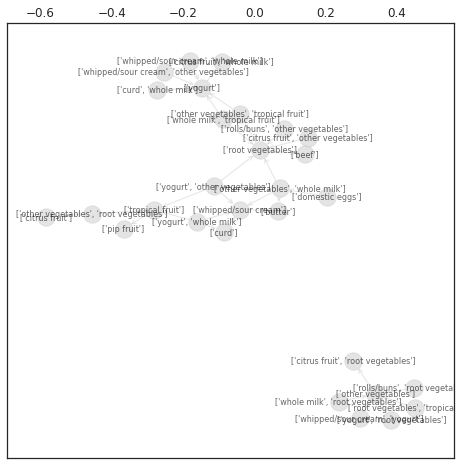

In [55]:
nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey'
                 # node_color=rules['support'].iloc[:47]
                )

The network is generated randomly. Whole milk and other vegetables seem to be strong nodes (consequents) that follow from most purchased items.   

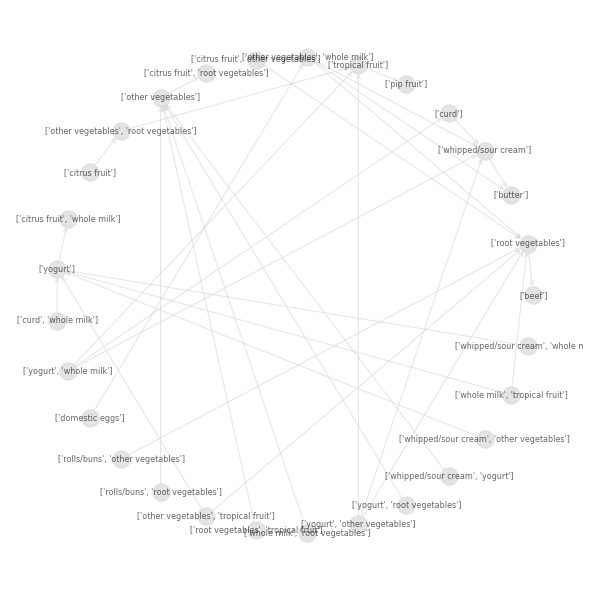

In [56]:
nx.draw_circular(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey'
                 # node_color=rules.sort_values(['support'])['support'].iloc[:47]
                )

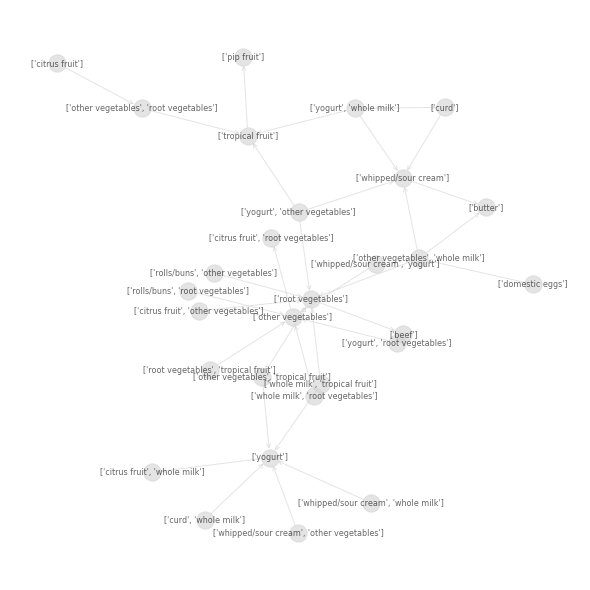

In [57]:
plt.rcParams['figure.figsize']=8,8
nx.draw_kamada_kawai(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey',
                )

In [58]:
def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['figure.figsize']=8,8 
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']='darkslategrey'
    plt.rcParams['ytick.color']='darkslategrey'
    plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linewidth=0.5,color='lightgray',alpha=0.8)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linewidth=0.5,color='lightgray',alpha=0.8)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color='gray')
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))


####**Extraction Rules Result Using Lift as Metrics**

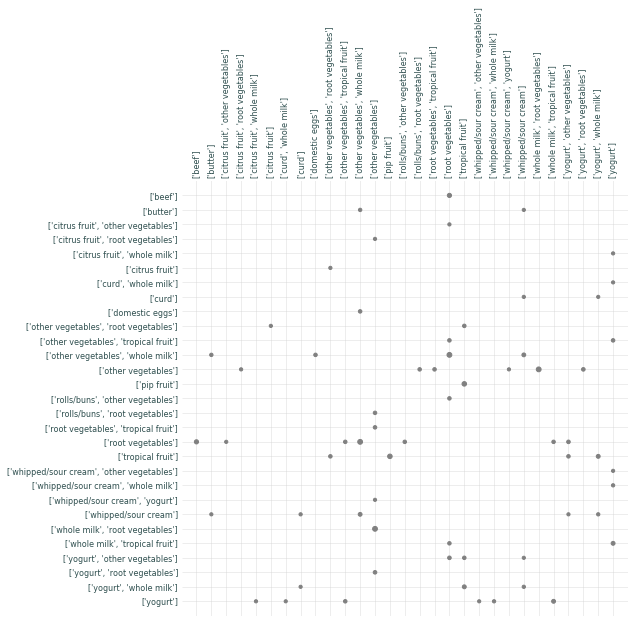

In [59]:
# catscatter(rules,'antecedent','consequent','support')

kcolors=['#F73972','#F2B3C6','#144962']
# create the plot
catscatter(rules,'antecedent','consequent','support',color=kcolors, ratio=1000)
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

###**Comparison of The Performance of Algorithm**

The results of analyzing goods sales transaction data using Apriori and Association Rules by setting a minimum support value of 1% and a minimum value of confidence of 40% is to produce a number of rules. In this study, the association rules algorithm is used to determine the antecedent, consequent, support, confidence and lift values. Meanwhile, the a priori algorithm is used to find frequent itemsets based on the minimum support value and confidence to then create a number of rules.

####**Conclusion**

Dairy products (such as whole milk, yogurt, curd, butter, and cream) are often associated with vegetable and fruit products (such as other vegetables, frozen vegetables, root vegetables, citrus fruit, and tropical fruit). It seems that it makes sense to put the dairy products close to the vegetables and fruits if it is the intent of the store owner only to sell those items. In practice however, these items are usually put at opposite ends of a store to encourage more browsing in between within the isles that could lead to more purchases. 

So naturally the items associated with other vegetables (such as fruits and vegetables) will be grouped together, as will the dairy products with each other. Special price offerings can be offered when these items are purchased together. 
As seen in a figure correlation between items above there is a cluster of meat and bread products that lead to the purchase of both vegetables and dairy. This could be stationed far away from the other products as well to encourage browsing. 
The owner of the store can offer deals on purchasing dairy and vegetable products together to encourage the browsing through the other isles (it makes them move from one end of the store to another). This would likely lead to more purchases of unrelated products. 